#**proyecto de regresion lineal y gradiente descendente**





**DESARROLLO**

Como primer paso se deben establecer las librerias necesarias para realizar los diferentes analisis tanto graficos como de trabajo de vectores entre otros.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

#Analisis del dataset

In [2]:
datos=pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")
print(datos)


       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]


A continuacion se verifica si hay datos nulos o vacios en el dataset.

In [3]:
total = datos.isnull().sum().sort_values(ascending=False)
percent_1 = datos.isnull().sum()/datos.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(datos.size)

,Total,%
Y2,0,0.0
Y1,0,0.0
X8,0,0.0
X7,0,0.0
X6,0,0.0
X5,0,0.0
X4,0,0.0
X3,0,0.0
X2,0,0.0
X1,0,0.0


Como se puede apreciar este dataset no tiene datos nulos lo que facilita el trabajo ya que no se debe eliminar o agregar ninguna columna o fila.

In [4]:
column_names = {'X1':'Compacidad_relativa', 
                'X2': 'Area_de_superficie',
                'X3': 'Area_de_pared',
                'X4': 'Area_del_techo',
                'X5': 'Altura_total',
                'X6': 'Orientacion', 
                'X7': 'Area_de_acristalamiento',
                'X8': 'Distribucion_del_area_de_acristalamiento',
                'Y1': 'Carga_de_calefaccion',
                'Y2': 'Carga_de_enfriamiento'}

datos.rename(columns=column_names, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



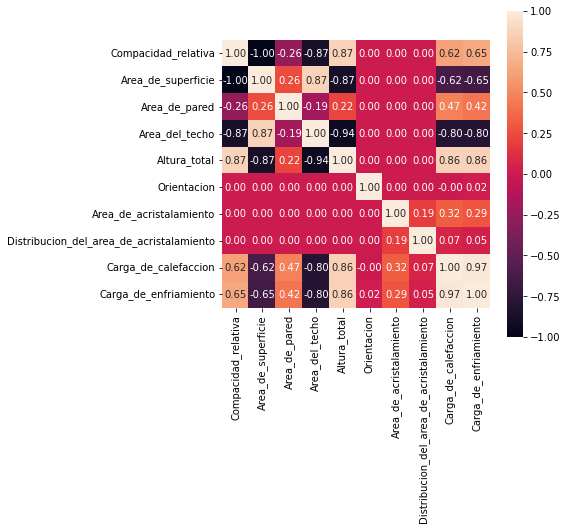

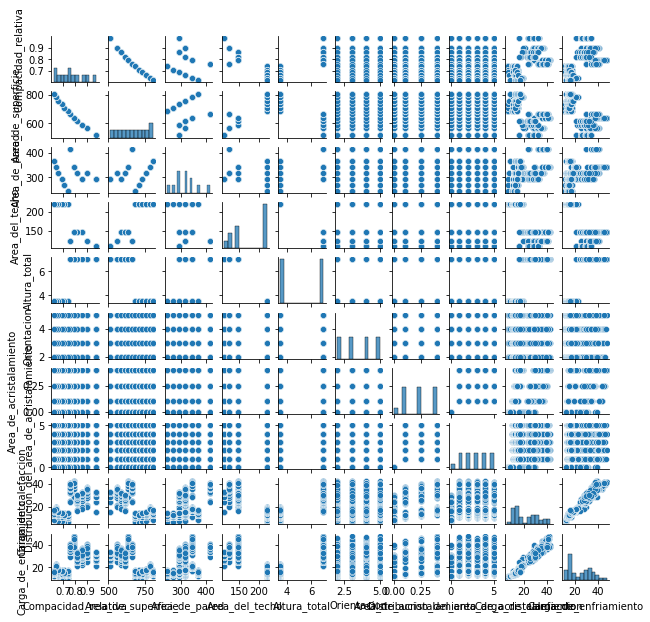

In [5]:
fig,ax=plt.subplots(figsize=(6,6))
correlacion=datos.corr(method='spearman')
sns.heatmap(correlacion,annot=True, fmt=".2f",square=True)
sns.pairplot(datos,height=1,aspect=1)
plt.show()

se seleccionan las columnas con correlacion mayor al 30% con respecto a la salida deseada en este caso "carga de calefaccion"

In [6]:
datos_sel=datos.iloc[:,[1,2,3,4,5,7,9]]
datos_sel

,Area_de_superficie,Area_de_pared,Area_del_techo,Altura_total,Orientacion,Distribucion_del_area_de_acristalamiento,Carga_de_enfriamiento
0,514.5,294.0,110.25,7.0,2,0,21.33
1,514.5,294.0,110.25,7.0,3,0,21.33
2,514.5,294.0,110.25,7.0,4,0,21.33
3,514.5,294.0,110.25,7.0,5,0,21.33
4,563.5,318.5,122.50,7.0,2,0,28.28
...,...,...,...,...,...,...,...
763,784.0,343.0,220.50,3.5,5,5,21.40
764,808.5,367.5,220.50,3.5,2,5,16.88
765,808.5,367.5,220.50,3.5,3,5,17.11
766,808.5,367.5,220.50,3.5,4,5,16.61


#NORMALIZACION

Una vez se ha realizado el dataset definitivo con el que se va a trabajar se debe normalizar todos los datos tanto de entrada como de salida para disminuir la funcion de costo y que el regresor trabaje de manera mas efectiva y tener mejores resultados.

Para este caso se desea normalizar los valores entre -1 y 1 ya que es un rango optimo para trabajar en regresion lineal.

In [7]:
#normalizar la entrada

scalerx= MinMaxScaler(feature_range=(-1,1))
scalerx.fit(datos_sel.iloc[:,0:6])
x_nor=scalerx.transform(datos_sel.iloc[:,0:6])
x_nor= np.array(x_nor)

#normalizar la salida

scalery= MinMaxScaler(feature_range=(-1,1))
y_nor=datos_sel.iloc[:,6].values
y_nor=y_nor.reshape(-1,1)
scalery.fit(y_nor)
y_nor=scalery.transform(y_nor)
y_nor=np.array(y_nor)

datos_nor= np.append(x_nor,y_nor,1)
datos_nor= pd.DataFrame(datos_nor)
datos_nor

,0,1,2,3,4,5,6
0,-1.000000,-0.428571,-1.000000,1.0,-1.000000,-1.0,-0.438190
1,-1.000000,-0.428571,-1.000000,1.0,-0.333333,-1.0,-0.438190
2,-1.000000,-0.428571,-1.000000,1.0,0.333333,-1.0,-0.438190
3,-1.000000,-0.428571,-1.000000,1.0,1.000000,-1.0,-0.438190
4,-0.666667,-0.142857,-0.777778,1.0,-1.000000,-1.0,-0.063830
...,...,...,...,...,...,...,...
763,0.833333,0.142857,1.000000,-1.0,1.000000,1.0,-0.434420
764,1.000000,0.428571,1.000000,-1.0,-1.000000,1.0,-0.677888
765,1.000000,0.428571,1.000000,-1.0,-0.333333,1.0,-0.665500
766,1.000000,0.428571,1.000000,-1.0,0.333333,1.0,-0.692432


A continuacion se realiza un mapa de calor con los valores normalizados, con esto comprobamos que las variables mantienen su correlacion con respecto a la salida y de este modo sabemos que se ha normalizado el dataset satisfactoriamente.

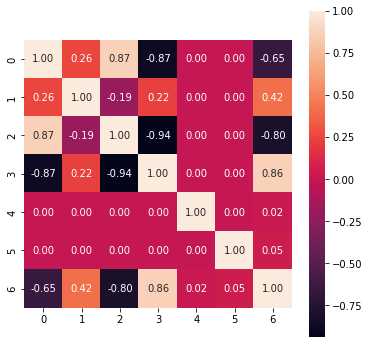

In [8]:
fig,ax=plt.subplots(figsize=(6,6))
correlacionN=datos_nor.corr(method='spearman')
sns.heatmap(correlacionN,annot=True, fmt=".2f",square=True)
plt.show()

#Division de dataset

El siguiente paso es dividir el dataset en datos de validacion y entrenamiento con los cuales se realizaran las diferentes pruebas, para ello se utiliza el dataset normalizado y se divide en 70% entrenamiento y 30% validacion.

In [9]:
xtrain,xtest,ytrain,ytest= train_test_split(x_nor,y_nor,test_size=0.3) #la division esta normalizada
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(537, 6)
(231, 6)
(537, 1)
(231, 1)


#Regresion con matrices


Ahora con el dataset dividido y normalizado podemos aplicar los metodos de regresion linela adecuadamente, por lo que empezaremos a hacer la prediccion por el metodo de matrices.

Para ello debemos respetar la siguiente operacion entre matrices

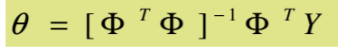

**Datos de entrenamiento**

El primer paso es crear una matriz para phi, esta esta compuesta por una columna de unos y las columnas de entrada del dataset.

In [10]:
phi_entre=np.c_[np.ones((xtrain.shape[0],1)),xtrain]
print(phi_entre.shape)

(537, 7)


Una vez creado phi se realiza la operacion para encontrar los coeficientes de theta

In [11]:
theta=np.linalg.inv(phi_entre.T.dot(phi_entre)).dot(phi_entre.T).dot(ytrain)
print(theta)

[[-0.29449703]
 [-1.22267985]
 [ 1.51057753]
 [ 1.63194393]
 [ 0.56381579]
 [ 0.01431506]
 [ 0.02646688]]


Por ultimo realizamos el producto punto entre phi y theta y asi encontramos la regresion lineal de la entrada de entrenamiento por medio de matrices, ademas se debe desnormalizar los datos para asi encontrar los valores de error de este metodo

In [12]:
YpredM=phi_entre.dot(theta)
Ypred_trainM=scalery.inverse_transform(YpredM) #desnormalizar la prediccion
Yori_trainM= scalery.inverse_transform(ytrain) #desnormalizar y_train
Xori_tranM= scalerx.inverse_transform(xtrain) #desnormalizar x_train

Al encontrar el error entre los datos originales de la salida con datos de entrenamiento y los datos de salida del regresor obtenemos un error cuadratico medio del 1.0072

In [13]:
mse= mean_squared_error(Yori_trainM,Ypred_trainM)
rmse= np.sqrt(mse)
rmse

9.31186983360034

**datos de validación**

Para los datos de validacion se realiza el mismo procedimiento que en el anterior, creando un phi pero esta vez ya se tiene el theta que se encontro anteriormente, ya que se desea validar el modelo se debe usar este theta y no crear uno nuevo, de esta manera comprobamos si el regresor esta funcionando para nuevos valores que se le entreguen.

In [14]:
phi_val=np.c_[np.ones((xtest.shape[0],1)),xtest]
print(phi_entre.shape)

(537, 7)


In [15]:
YpredV=phi_val.dot(theta)
Ypred_testM=scalery.inverse_transform(YpredV)
Yori_testM= scalery.inverse_transform(ytest)
Xori_testM= scalerx.inverse_transform(xtest)

In [16]:
mseV= mean_squared_error(Yori_testM,Ypred_testM)
rmseV= np.sqrt(mseV)
rmseV

9.62840672956556

**Graficos**

A continuacion graficamos el comportamiento de las salidas para entrenamiento y validacion en el regresor con matrices donde los puntos rojos representan la prediccion y los puntos azules los datos originales

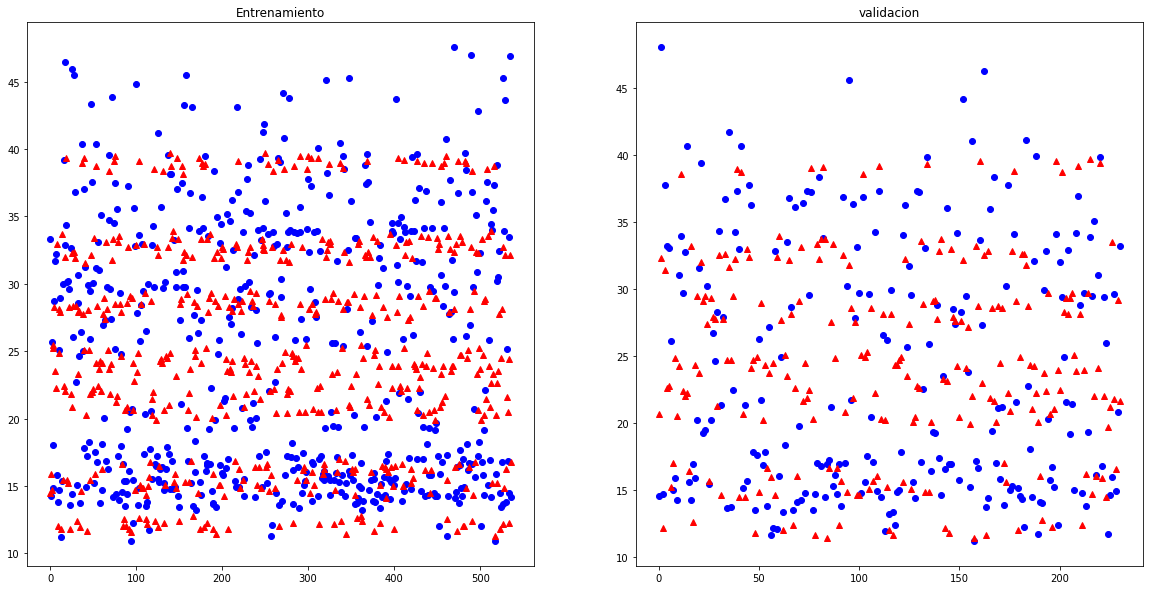

In [17]:

fig, ax=plt.subplots(figsize=(20,10),ncols=2,nrows=1)
ax[0].plot(Yori_trainM,'bo')
ax[0].set_title('Entrenamiento')
ax[0].plot(Ypred_trainM,'r^')
ax[1].set_title('validacion')
ax[1].plot(Yori_testM,'bo')
ax[1].plot(Ypred_testM,'r^')

##Regrecion gradiente descendente a mano

In [18]:
Xtrain=pd.DataFrame(xtrain)
Ytrain=pd.DataFrame(ytrain)
Xtest=pd.DataFrame(xtest)
Ytest=pd.DataFrame(ytest)

In [45]:

phiGM_entre=np.c_[np.ones((ytrain.shape[0],1)),Xtrain]
print(phiGM_entre.shape)
P= len(ytrain)
X=pd.DataFrame(phiGM_entre)
X

(537, 7)


,0,1,2,3,4,5,6
0,1.0,-1.000000,-0.428571,-1.000000,1.0,-0.333333,-0.6
1,1.0,0.333333,-0.714286,1.000000,-1.0,-0.333333,-0.6
2,1.0,-1.000000,-0.428571,-1.000000,1.0,-1.000000,0.2
3,1.0,0.666667,-0.142857,1.000000,-1.0,1.000000,0.6
4,1.0,0.666667,-0.142857,1.000000,-1.0,1.000000,1.0
...,...,...,...,...,...,...,...
532,1.0,0.500000,-0.428571,1.000000,-1.0,-1.000000,0.6
533,1.0,0.166667,-1.000000,1.000000,-1.0,-1.000000,1.0
534,1.0,-0.500000,-0.428571,-0.333333,1.0,1.000000,1.0
535,1.0,-0.166667,0.142857,-0.333333,1.0,1.000000,-0.6


In [44]:
thetaGM = np.array ([0] * len (X.columns))

thetaGM.shape


(7,)

In [32]:
 def hipotesis(theta, X): 
    return theta * X

In [33]:
def computeCost (X, y, theta): 
    y1 = hipotesis (theta, X) 
    y1 = np.sum (y1, axis = 1) 
    return sum (np.sqrt ((y1-y) ** 2)) / (2 * P)

In [59]:
def gradientDescent (X, y, theta, alpha, i): 
    J = [] # función de coste en cada iteración 
    k = 0 
    while k <i:         
        y1 = hipotesis (theta, X) 
        y1 = np.sum (y1, axis = 1) 
        for c in range (0, len (X.columns)): 
            theta [c] = theta [c] - alpha * (sum ((y1-y) * X.iloc [:, c]) ) 
        j = computeCost (X, y, theta) 
        J.append (j) 
        k += 1 
    return J, j, theta

In [65]:
J, j, theta = gradientDescent(X, Ytrain, thetaGM, 0.001, 1000)

In [61]:
theta

array([-1439000, -1439000, -1439000, -1439000, -1439000, -1439000,
       -1439000])

In [62]:
y_hat = hipotesis (theta, X) 
y_hat = np.sum (y_hat, axis = 1)

In [63]:
Ytraind=scalery.inverse_transform(Ytrain)

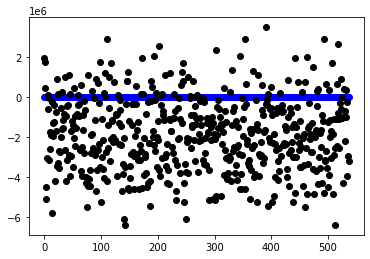

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, P)),y= Ytraind, color='blue')         
plt.scatter(x=list(range(0, P)), y=y_hat, color='black')
plt.show()

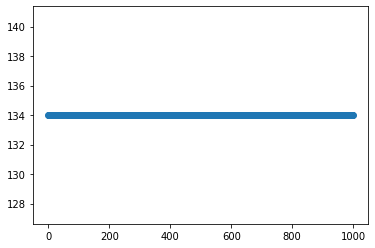

In [46]:
plt.figure () 
plt.scatter (x = list (range (0, 1000)), y = J) 
plt.show ()

#Regresion por gradiente decendente

In [58]:

phiG_entre=np.c_[np.ones((ytrain.shape[0],1)),xtrain]
print(phiG_entre.shape)



(537, 7)


El ultimo metodo es el gradiente descendente, este metodo tiene como caracteristica principal que busca reducir la funcion de costo, ademas de trabajar con la relacion entre las entradas y el error para eso se le debe dar un numero de iteraccione y un ratio de aprendizaje al cual queremos que el modelo de regresion llegue, esto a travez de la evolucion de parametros como theta y la funcion de perdidas.

**Datos de entrenamiento**

el primer paso es crear una matriz phi con las caracteristica mencionadas en el primer metodo.

Se define la funcion de perdidas.

In [48]:

def  cal_lost(theta,Phi,y):
    P = len(y)
    prediccion = Phi.dot(theta)
    cost = (1/P) * np.sum(np.square(y-prediccion))
    return cost


Se proporciona un ratio de aprendizaje y un numero de iteraciones asi como un valor inicial aleatorio para theta

In [49]:

learning_rate =0.02 #Alpha
iteraciones= 1000
coeficientesTrain=xtrain.shape[1]+1
thetaG=np.random.rand(coeficientesTrain,1)
print(thetaG)



[[0.79938935]
 [0.2585616 ]
 [0.25179662]
 [0.91053413]
 [0.72975098]
 [0.45640145]
 [0.19868168]]


Ahora se realiza el un bucle con el fin de hallar los parametros de theta que mejor se ajusten a el ratio de aprendizaje y el error mas bajo posible

In [50]:

P= len(ytrain)
lost_history = np.zeros(iteraciones)
theta_history = np.zeros((iteraciones,thetaG.shape[0]))
for it in range(iteraciones):
        prediccion = phiG_entre.dot(thetaG)
        error=ytrain-prediccion
        thetaG = thetaG +(2/P)*learning_rate*( phiG_entre.T.dot(error))
        theta_history[it,:] =thetaG.T
        lost_history[it]  = cal_lost(thetaG,phiG_entre,ytrain)

print("\ncoeficientes: \n",thetaG[:,0])



coeficientes: 
 [-0.29641404 -0.12472289  0.27124394  0.38436244  0.6653902   0.01228455
  0.02632544]


Una vez se tiene los coeficientes de theta se procede a hacer la prediccion de el modelo de netrenamiento a partir de la entrada de entrenamiento como se muestra a continuacion.

In [51]:

ypred_trainG=phiG_entre.dot(thetaG)
Ypred_trainG=scalery.inverse_transform(ypred_trainG)
Yori_trainG= scalery.inverse_transform(ytrain)
Xori_trainG= scalerx.inverse_transform(xtrain)

mse= mean_squared_error(Yori_trainG,ypred_trainG)
rmse= np.sqrt(mse)


print("\n rmse: ", rmse)



 rmse:  26.704480772513566


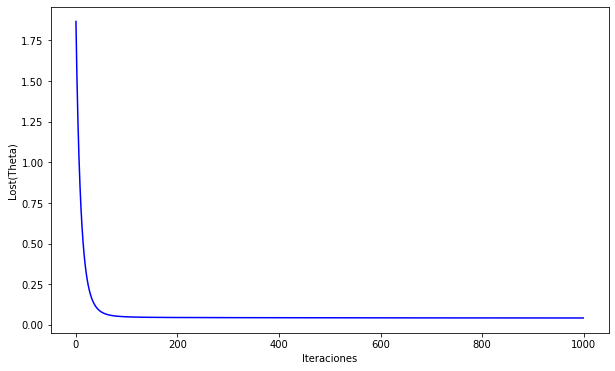

In [52]:
fig,ax = plt.subplots(figsize=(10,6))
ax.set_ylabel('Lost(Theta)')
ax.set_xlabel('Iteraciones')
_=ax.plot(range(iteraciones),lost_history,'b')

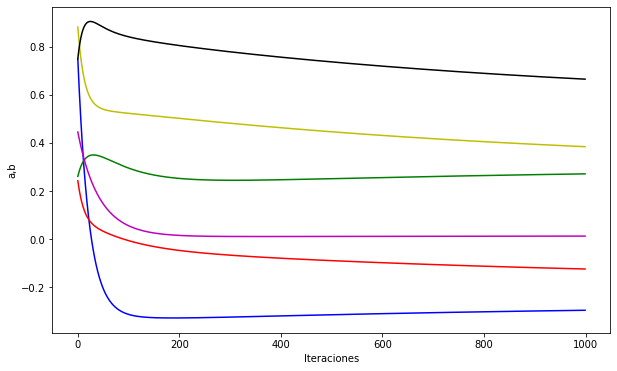

In [53]:
fig,ax = plt.subplots(figsize=(10,6))
ax.set_ylabel('a,b')
ax.set_xlabel('Iteraciones')
_=ax.plot(range(iteraciones),theta_history[:,0],'b')
_=ax.plot(range(iteraciones),theta_history[:,1],'r')
_=ax.plot(range(iteraciones),theta_history[:,2],'g')
_=ax.plot(range(iteraciones),theta_history[:,3],'y')
_=ax.plot(range(iteraciones),theta_history[:,4],'k')
_=ax.plot(range(iteraciones),theta_history[:,5],'m')

En el grafico anterior vemos la evolucion de thetha poara cada variable

**Datos de validacion**

Ahora que ya tenemos un theta definido se procede a comprobar el modelo a traves de los datos de validación.

In [54]:
phiG_val=np.c_[np.ones((ytest.shape[0],1)),xtest]

ypred_testG=phiG_val.dot(thetaG)
Ypred_testG=scalery.inverse_transform(ypred_testG)
Yori_testG= scalery.inverse_transform(ytest)
Xori_testG= scalerx.inverse_transform(xtest)

mse= mean_squared_error(Yori_testG,ypred_testG)
rmse= np.sqrt(mse)

print("\n rmse: ", rmse)



 rmse:  25.86575986200675


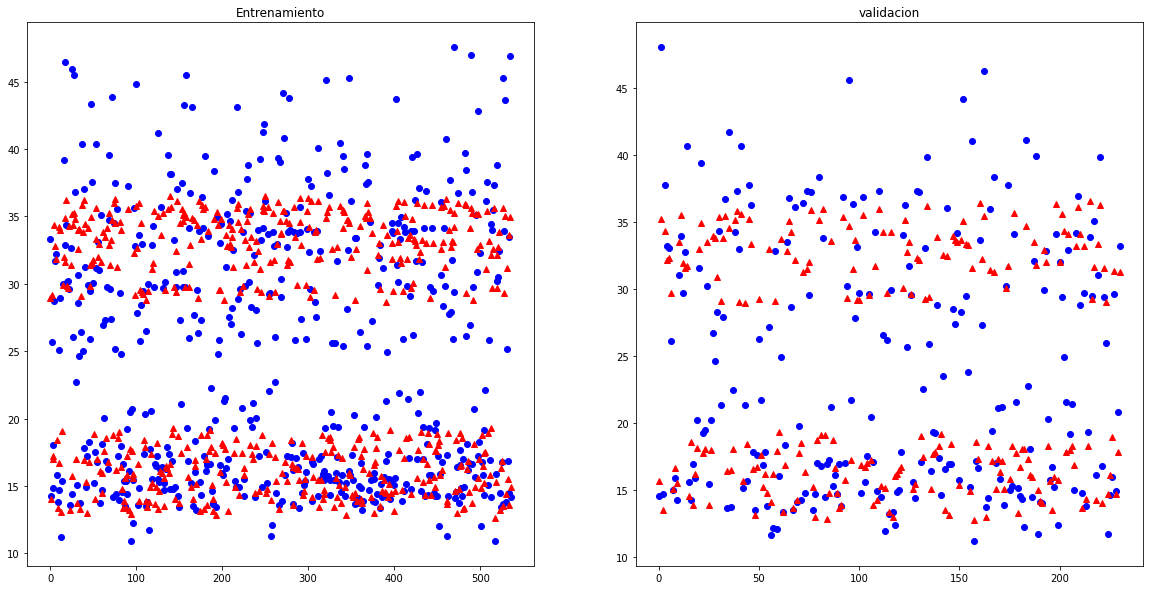

In [55]:
fig, ax=plt.subplots(figsize=(20,10),ncols=2,nrows=1)
ax[0].plot(Yori_trainG,'bo')
ax[0].set_title('Entrenamiento')
ax[0].plot(Ypred_trainG,'r^')
ax[1].set_title('validacion')
ax[1].plot(Yori_testG,'bo')
ax[1].plot(Ypred_testG,'r^')

**Graficos de variables en cada metodo**

Para finalizar se realiza la grafica de cada variable en cuanto a datos predichos con respecto a los originales, es decir para cada entrada un grafico tanto para entrenamiento (columnas impares) como para validacion (columnas pares).

Donde la primera fila de graficos corresponde a el metodo de matrices, la segunda fila al metodo de  de gradiente descendente.

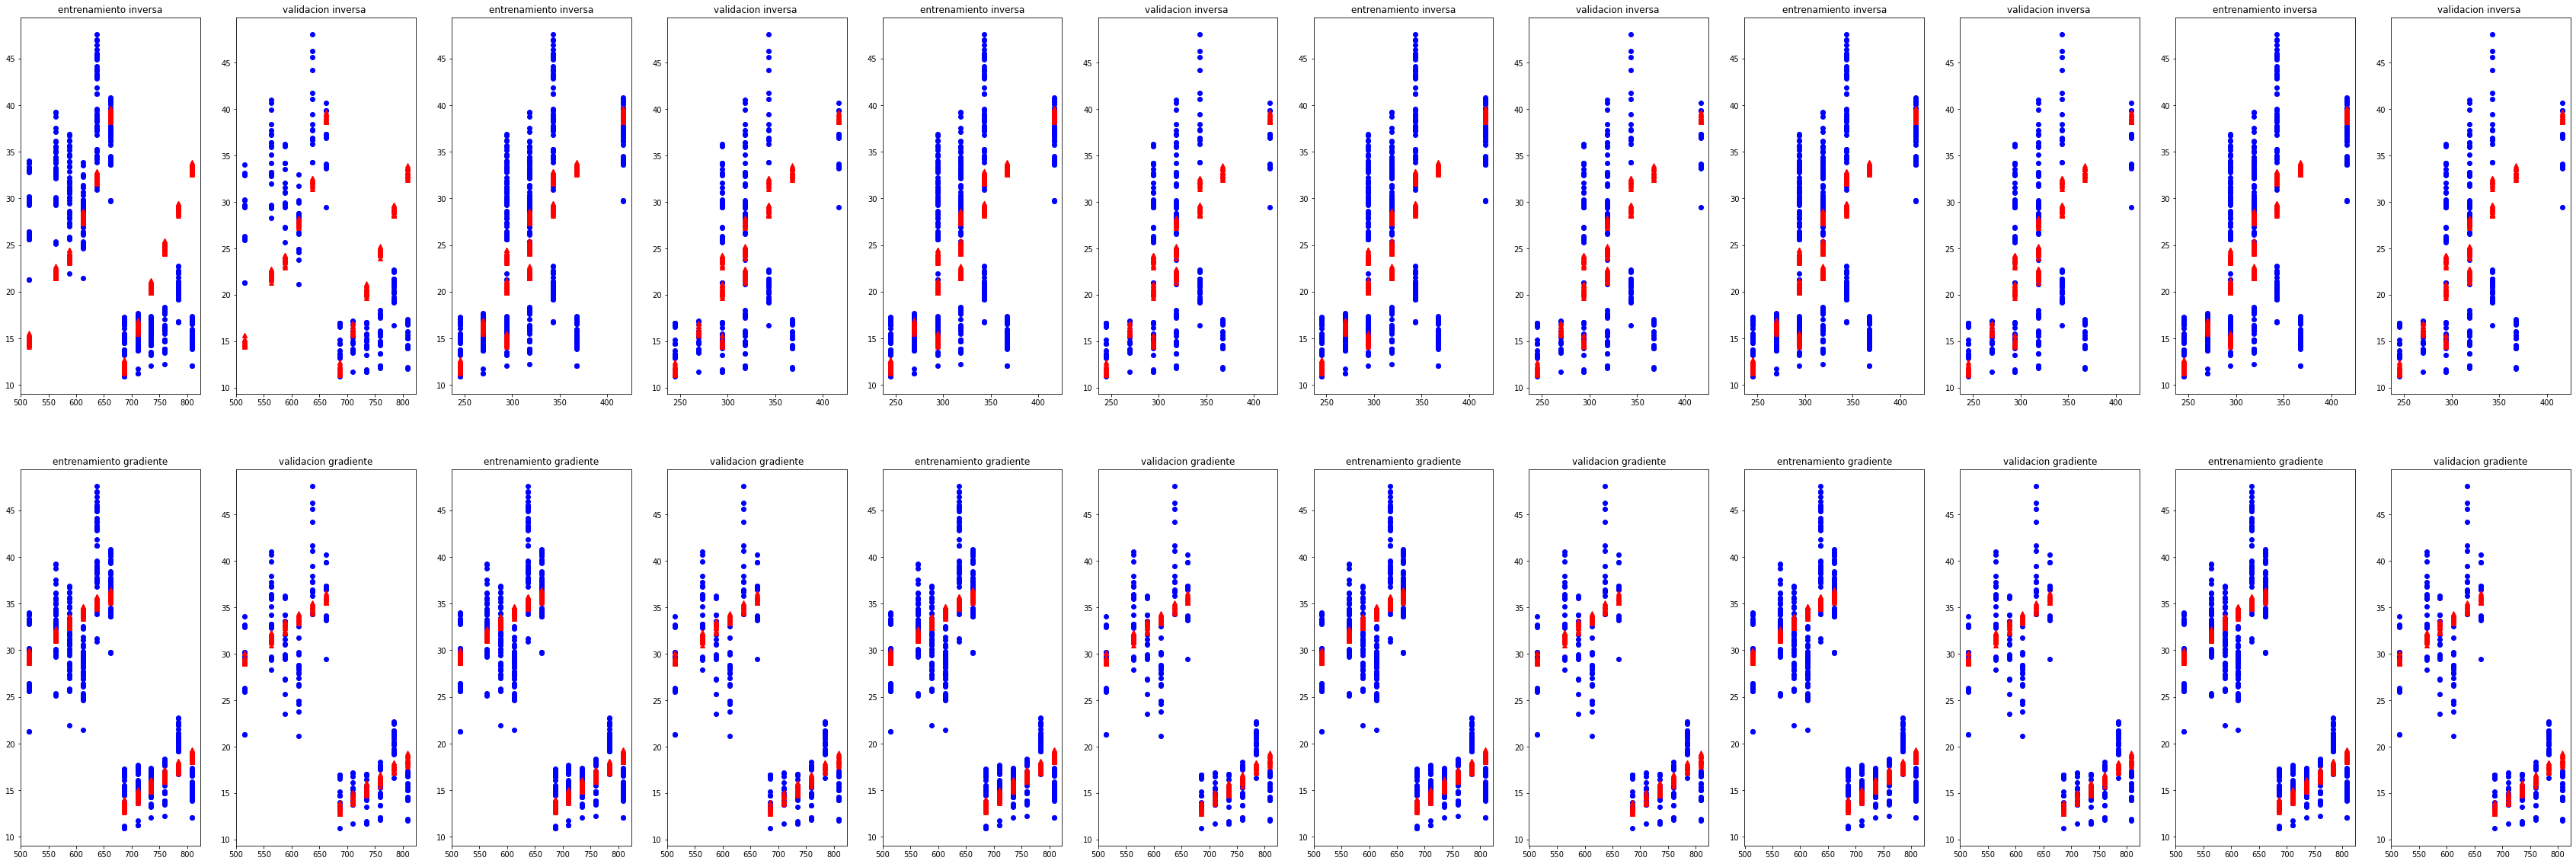

In [56]:
filas=2
columnas = (x_nor.shape[1])*2
cont=0
v=0
fig, ax= plt.subplots(figsize=(60,20),ncols=columnas,nrows=filas)

#matrices
for col in range (columnas):

  if col%2==0:
    ax[0,col].plot(Xori_tranM[:,v],Yori_trainM,'bo')
    ax[0,col].plot(Xori_tranM[:,v],Ypred_trainM,'r^')
    ax[0,col].set_title('entrenamiento inversa')
    
    cont+=1
  else:
    ax[0,col].plot(Xori_testM[:,v],Yori_testM,'bo')
    ax[0,col].plot(Xori_testM[:,v],Ypred_testM,'r^') 
    ax[0,col].set_title('validacion inversa ')
    cont+=1
    if cont==2:
      v+=1
      cont==0
v=0


#gradiente decendente

for col in range (columnas):

  if col%2==0:
    ax[1,col].plot(Xori_trainG[:,v],Yori_trainG,'bo')
    ax[1,col].plot(Xori_trainG[:,v],Ypred_trainG,'r^')
    ax[1,col].set_title('entrenamiento gradiente')
    cont+=1
  else:
    ax[1,col].plot(Xori_testG[:,v],Yori_testG,'bo')
    ax[1,col].plot(Xori_testG[:,v],Ypred_testG,'r^')
    ax[1,col].set_title('validacion gradiente')
    cont+=1
    if cont==2:
      v+=1
      cont==0
v=0



